# Monthly Playlist Analysis

> Todo
> - `sp.playlist` only returns first 100 tracks. Not sure there's a way to offset the spotipy

## 0.0 Imports & Setup

### 0.1 Imports

In [18]:
import numpy as np
import pandas as pd
import datetime
import time
from matplotlib import pyplot as plt
from tqdm import tqdm
import os

from src.playlists import MonthlyPlaylistHandler

### 0.2 Setup

In [19]:
mpl = MonthlyPlaylistHandler()
sp = mpl.spotify_client

## 1.0 Demonstration

In [27]:
mpl.get_monthly_playlists()

df_mpls = mpl.read_monthly_playlists()

df_mpls

/Users/hugoneely/Documents/Coding/spotify-project/src/playlists.py:202: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date']).dt.date


,date,name,description,n_tracks,url,cover_image_url,snapshot_id
id,,,,,,,
1ZuOGhyyL9u6nZMkrPOaXi,2025-10-01,October 2025,NaN,6,https://api.spotify.com/v1/playlists/1ZuOGhyyL...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAACDft4IwcTGO3u3tm8j8PgcdGoneJ
7gKE5N6YKBxYPn0mT9kFBo,2025-09-01,September 2025,corporate grovelling,36,https://api.spotify.com/v1/playlists/7gKE5N6YK...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAALGmKtp986hmTgJFSus2jvXDZW3Yy
1PCGDpdCdvZYfi2mvXmfcX,2025-08-01,August 2025,disaugusting,34,https://api.spotify.com/v1/playlists/1PCGDpdCd...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAAKcx0r02VEirIzO/nt23SHVb5180H
32eRKtHIGg5ZS18jE1tIC3,2025-07-01,July 2025,good problems to have,51,https://api.spotify.com/v1/playlists/32eRKtHIG...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAAObVlPqOjK1N5NJHqHtn5SDZb8p9D
1dAKocsMZ2g4AqkY9nV906,2025-06-01,June 2025,it seems perhaps they will,65,https://api.spotify.com/v1/playlists/1dAKocsMZ...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAATonlWMYADrWYH0pgK67Tguhmo7ic
...,...,...,...,...,...,...,...
2FPpIykbTksWiEpQOoo0IX,2018-05-01,may 2018,pv = n r t,30,https://api.spotify.com/v1/playlists/2FPpIykbT...,https://image-cdn-fa.spotifycdn.com/image/ab67...,AAAAIyn+OulAx6smCpUkxFymtLsbo/dr
5TKjuQprN0KrP6JODUDgv0,2018-04-01,april 2018,shacking up,37,https://api.spotify.com/v1/playlists/5TKjuQprN...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAANFySg4bUYJ+jHFH83WH+SBa6GSDn
2KrIMSlTHz7UTUT8y1CjCP,2018-03-01,march 2018,beats from the east,38,https://api.spotify.com/v1/playlists/2KrIMSlTH...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAAMYCwh3qoyRCIBN79A0Zy/0ry3EVB


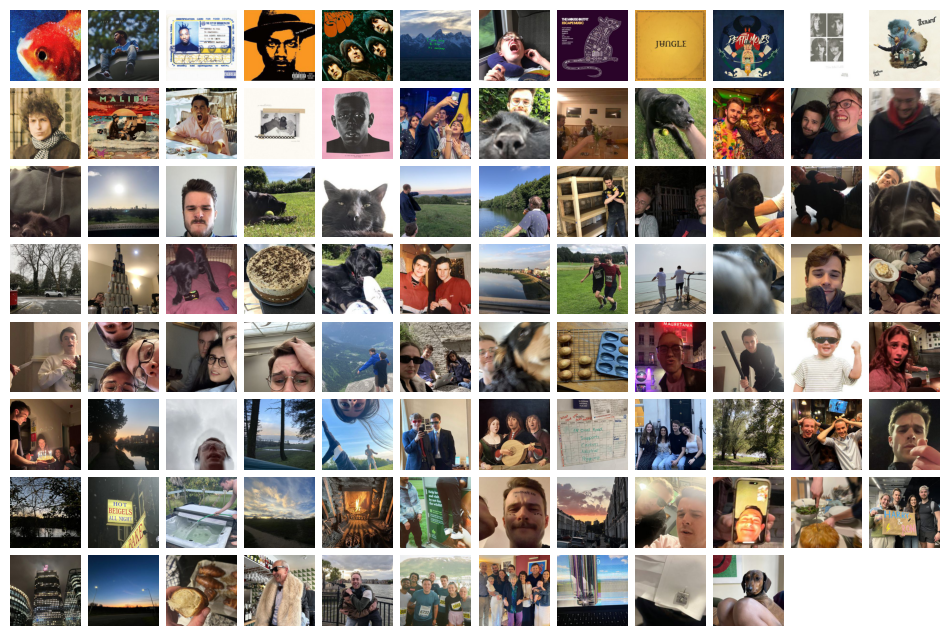

In [29]:
fig, axs = mpl.plot_playlist_covers(wspace=0.1, hspace=0.1)
plt.show()

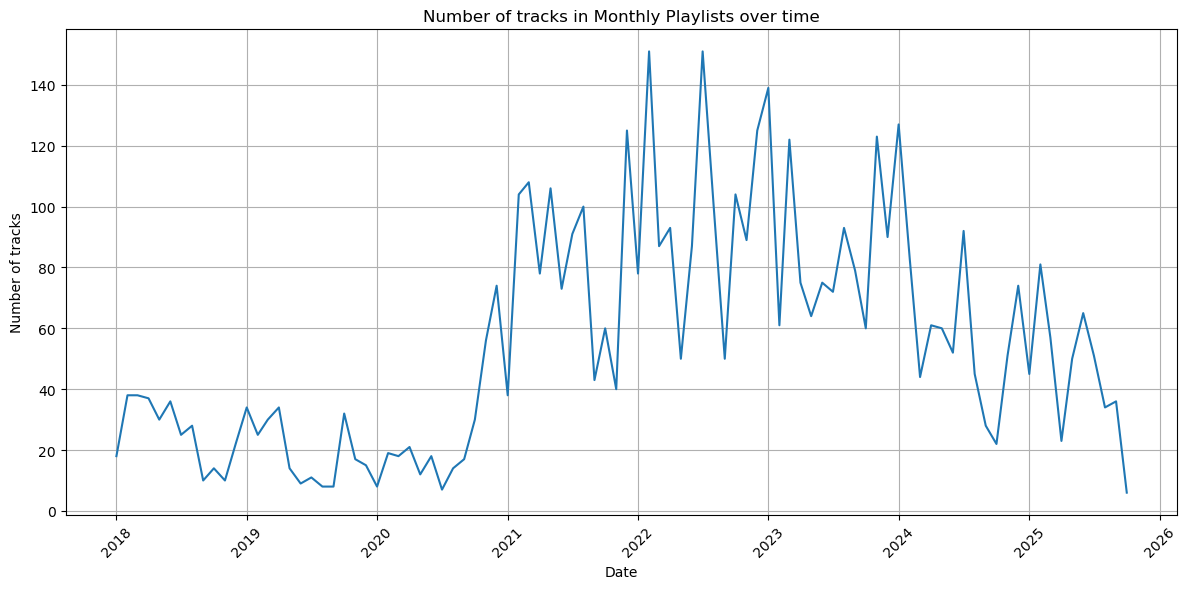

In [30]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(pd.to_datetime(df_mpls['date']).dt.date, df_mpls['n_tracks'])
ax.set_title('Number of tracks in Monthly Playlists over time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of tracks')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()  

In [84]:
df_tracks = mpl.read_tracks(download_if_required=True)

In [113]:
df_tracks

,track_name,track_artist,track_date_added,playlist_name,track_index,track_artist_index,track_artist_spid,track_album,track_release_date,track_release_date_precision,track_duration,track_popularity,track_external_ids,track_spid,track_artist_genres,track_artist_popularity
0,Goodums - Sammy Virji Remix,Unknown T,2025-10-02T15:55:52Z,October 2025,1,1,3iAhNz3e31lBuXYOsqGsf3,Goodums (Sammy Virji Remix),2023-10-20,day,184364,56,{'isrc': 'GBUM72309289'},0SLedTMdKihqLsR6CGPAfD,"[uk drill, drill, grime, uk grime, afroswing]",54
1,Goodums - Sammy Virji Remix,Sammy Virji,2025-10-02T15:55:52Z,October 2025,1,2,1GuqTQbuixFHD6eBkFwVcb,Goodums (Sammy Virji Remix),2023-10-20,day,184364,56,{'isrc': 'GBUM72309289'},0SLedTMdKihqLsR6CGPAfD,"[uk garage, bassline, bass house, house]",66
2,Send My Love to Linda,Jimi Hendrix,2025-10-02T15:56:35Z,October 2025,2,1,776Uo845nYHJpNaStv1Ds4,Both Sides of the Sky,2018-03-09,day,276786,31,{'isrc': 'USQX91702594'},2bE5QqVc9q4w5ETEKAazQr,"[psychedelic rock, classic rock, acid rock, bl...",67
3,No Merci,Little Simz,2025-10-02T15:56:46Z,October 2025,3,1,6eXZu6O7nAUA5z6vLV8NKI,NO THANK YOU,2022-12-12,day,317278,46,{'isrc': 'QMFME2257576'},552lBxKLGjerBDS8VYHOJn,[],66
4,Stunt Like This,Young Franco,2025-10-02T17:24:02Z,October 2025,4,1,6mK0vAO13gT8jWYANyoXAl,Stunt Like This,2024-10-10,day,166774,31,{'isrc': 'AUNE32400017'},32cWu1hGQ3SgFPqEe2xVyl,[],53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6967,Two Words,Mos Def,2018-01-17T18:15:42Z,january 2018,16,2,0Mz5XE0kb1GBnbLQm2VbcO,The College Dropout (Explicit),2004-01-01,day,266213,0,{'isrc': 'USDJ20300915'},7EzY5a2CMrK5KqCxoOeyIj,"[east coast hip hop, old school hip hop, hip hop]",65
6968,Two Words,Freeway,2018-01-17T18:15:42Z,january 2018,16,3,2Jwr7hGoSNK3S3QBxh3T0z,The College Dropout (Explicit),2004-01-01,day,266213,0,{'isrc': 'USDJ20300915'},7EzY5a2CMrK5KqCxoOeyIj,[east coast hip hop],51
6969,Two Words,The Boys Choir Of Harlem,2018-01-17T18:15:42Z,january 2018,16,4,7Cp14KBRtDwGucKNPUyT11,The College Dropout (Explicit),2004-01-01,day,266213,0,{'isrc': 'USDJ20300915'},7EzY5a2CMrK5KqCxoOeyIj,[southern gospel],45
6970,"Lie, Cheat, Steal",Run The Jewels,2018-01-31T17:23:09Z,january 2018,17,1,4RnBFZRiMLRyZy0AzzTg2C,Run the Jewels 2,2014-10-24,day,208466,0,{'isrc': 'QM8RL1400018'},3UN6UkL6M0l8vfZS7OffZ6,[hip hop],58


In [ ]:
set(df_tracks['track_artist_genres'].sum())

358

In [102]:
def genres_contain(df, text):
    return df['track_artist_genres'].apply(lambda x: text in ' '.join(x))

def genre_in(df, genre):
    return df['track_artist_genres'].apply(lambda x: genre in x)

df_tracks.loc[genres_contain(df_tracks, 'funk')]

,track_name,track_artist,track_date_added,playlist_name,track_index,track_artist_index,track_artist_spid,track_album,track_release_date,track_release_date_precision,track_duration,track_popularity,track_external_ids,track_spid,track_artist_genres,track_artist_popularity
8,"Give Thanks, Give Praise",Tommy Villiers,2025-10-02T17:27:57Z,October 2025,5,3,4M4KGWKy7pSQ5HaJNCutBN,it's Franky baby!,2025-01-24,day,221602,52,{'isrc': 'AUNE32400021'},3iNAdtlehRYGgYV6rt07IM,"[uk garage, drum and bass, liquid funk, rally ...",51
64,伊豆甘夏納豆売り,Masayoshi Takanaka,2025-08-12T18:51:53Z,August 2025,10,1,2Ex4vjQ6mSh5woTlDWto6d,BRASILIAN SKIES,1978-01-01,year,409000,43,{'isrc': 'JPKT07800508'},3lo62oIkdf6b5ufn6HUaHh,"[jazz fusion, city pop, jazz funk]",59
88,Bring Down the Birds - Outtake,Herbie Hancock,2025-08-25T15:07:09Z,August 2025,26,1,2ZvrvbQNrHKwjT7qfGFFUW,Blow-Up (Original Motion Picture Soundtrack),1967-02-24,day,106306,39,{'isrc': 'USNLR1700242'},3i0meyRRCpIzyMmLdYssGw,"[jazz, jazz fusion, jazz funk, hard bop, cool ...",55
89,"Windjammer - Live At The Lighthouse, Hermosa B...",Grant Green,2025-08-25T15:29:35Z,August 2025,27,1,6dAtGAnHCQ1ujMUZ9Ep82k,Live At The Lighthouse,1998-01-01,day,735600,16,{'isrc': 'USBN29700355'},2JqnTQh5Shj7V5geLwXJZj,"[hard bop, jazz, jazz funk, soul jazz, bebop, ...",42
154,Joshua Fit De Battle Of Jericho,Grant Green,2025-07-28T07:39:56Z,July 2025,50,1,6dAtGAnHCQ1ujMUZ9Ep82k,Retrospective,2002-01-01,day,484493,34,{'isrc': 'USBN20200395'},7M2stwcE97dpVizQHsGJpA,"[hard bop, jazz, jazz funk, soul jazz, bebop, ...",42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,Xxplosive,Dr. Dre,2018-03-09T12:09:59Z,march 2018,8,1,6DPYiyq5kWVQS4RGwxzPC7,2001 (Explicit Version),1999-11-16,day,215266,0,{'isrc': 'USIR19915073'},2g9E9UyZ3pdJ1eqUQW0tfQ,"[old school hip hop, g-funk, gangster rap, wes...",79
6839,Xxplosive,Hittman,2018-03-09T12:09:59Z,march 2018,8,2,3np2OYRZAgI4e6lxeGmGr8,2001 (Explicit Version),1999-11-16,day,215266,0,{'isrc': 'USIR19915073'},2g9E9UyZ3pdJ1eqUQW0tfQ,"[g-funk, west coast hip hop]",58
6841,Xxplosive,Nate Dogg,2018-03-09T12:09:59Z,march 2018,8,4,1Oa0bMld0A3u5OTYfMzp5h,2001 (Explicit Version),1999-11-16,day,215266,0,{'isrc': 'USIR19915073'},2g9E9UyZ3pdJ1eqUQW0tfQ,"[g-funk, west coast hip hop, old school hip hop]",75
6842,Xxplosive,Kurupt,2018-03-09T12:09:59Z,march 2018,8,5,6NyJIFHAePjHR1pFxwisqz,2001 (Explicit Version),1999-11-16,day,215266,0,{'isrc': 'USIR19915073'},2g9E9UyZ3pdJ1eqUQW0tfQ,"[g-funk, west coast hip hop, gangster rap, old...",60


In [117]:
df_tracks['track_spid'].nunique()/df_tracks.groupby(['playlist_name', 'track_index']).ngroups

0.8106758832565284

In [105]:
df_tracks.loc[genre_in(df_tracks, 'funk')]

,track_name,track_artist,track_date_added,playlist_name,track_index,track_artist_index,track_artist_spid,track_album,track_release_date,track_release_date_precision,track_duration,track_popularity,track_external_ids,track_spid,track_artist_genres,track_artist_popularity
187,New Beastly,Vulfpeck,2025-06-07T10:01:33Z,June 2025,25,1,7pXu47GoqSYRajmBCjxdD6,Clarity of Cal,2025-03-04,day,251748,48,{'isrc': 'QMFMF2433745'},1yQNHzLx4VFofmUNHT3FHa,"[funk, funk rock]",57
188,Give It To Me Baby,Rick James,2025-06-07T11:49:41Z,June 2025,26,1,0FrpdcVlJQqibaz5HfBUrL,Street Songs (Deluxe Edition),1981-04-07,day,248133,67,{'isrc': 'USMO18100047'},13v3siPyvy5TTEZYmGPPse,"[funk, motown, disco]",60
235,Ace of Aces,The Fearless Flyers,2025-05-03T08:54:51Z,May 2025,2,1,1JyLSGXC3aWzjY6ZdxvIXh,The Fearless Flyers,2018-03-30,day,124565,48,{'isrc': 'QM4DW1837696'},1SlkhRMOEJp97Ho0BaIOkj,"[funk, jazz funk, jazz fusion, funk rock]",45
270,The Warped State of...,The Fearless Flyers,2025-05-17T13:15:40Z,May 2025,31,1,1JyLSGXC3aWzjY6ZdxvIXh,The Fearless Flyers V,2025-05-16,day,269322,34,{'isrc': 'QZMEP2531163'},6aRXneXHdBPQnHx44EtApJ,"[funk, jazz funk, jazz fusion, funk rock]",45
308,Watermelon Man (feat. Chops Horns),Bernie Worrell,2025-04-23T08:51:03Z,April 2025,12,1,3vB7T6czx1Jh89YEnzM0UF,Standards,2011-06-07,day,377586,24,{'isrc': 'USEWC1183728'},6lu9r3Liqac6QmAbnZdfED,[funk],18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6381,Back Pocket,Vulfpeck,2019-04-23T19:44:33Z,april 2019,24,1,7pXu47GoqSYRajmBCjxdD6,Thrill of the Arts,2015-10-09,day,181259,62,{'isrc': 'TCACH1515840'},1DrlLvlYd1FIjNavRm6NdX,"[funk, funk rock]",57
6382,Dean Town,Vulfpeck,2019-04-23T20:18:09Z,april 2019,25,1,7pXu47GoqSYRajmBCjxdD6,The Beautiful Game,2016-10-17,day,213302,54,{'isrc': 'TCACS1623891'},1oOD1pV43cV9sHg97aBdLs,"[funk, funk rock]",57
6479,"After The Storm (feat. Tyler, The Creator & Bo...",Bootsy Collins,2019-02-28T13:02:30Z,february 2019,24,3,5K0rbdBrs2tNXe5LeWMATT,After The Storm (Pete Rock Remix),2018-06-08,day,225026,51,{'isrc': 'GBUM71802202'},1aKzgL3nsei4Idwi8H9Zts,[funk],66
6530,Smile Meditation,Vulfpeck,2018-12-10T15:14:21Z,december 2018 ⛄️,4,1,7pXu47GoqSYRajmBCjxdD6,Thrill of the Arts,2015-10-09,day,269335,42,{'isrc': 'TCACH1515847'},7a00cQDulg05uPkHuFoQiS,"[funk, funk rock]",57


## 2.0 Prototyping

In [121]:
df_mpls.head(5)

,date,name,description,n_tracks,url,cover_image_url,snapshot_id
id,,,,,,,
1ZuOGhyyL9u6nZMkrPOaXi,2025-10-01,October 2025,NaN,6,https://api.spotify.com/v1/playlists/1ZuOGhyyL...,https://mosaic.scdn.co/640/ab67616d00001e021a9...,AAAAB0lbqEn5IXjBmT6oE/TbeLlS5o/X
7gKE5N6YKBxYPn0mT9kFBo,2025-09-01,September 2025,corporate grovelling,36,https://api.spotify.com/v1/playlists/7gKE5N6YK...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAALGmKtp986hmTgJFSus2jvXDZW3Yy
1PCGDpdCdvZYfi2mvXmfcX,2025-08-01,August 2025,disaugusting,34,https://api.spotify.com/v1/playlists/1PCGDpdCd...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAAKcx0r02VEirIzO/nt23SHVb5180H
32eRKtHIGg5ZS18jE1tIC3,2025-07-01,July 2025,good problems to have,51,https://api.spotify.com/v1/playlists/32eRKtHIG...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAAObVlPqOjK1N5NJHqHtn5SDZb8p9D
1dAKocsMZ2g4AqkY9nV906,2025-06-01,June 2025,it seems perhaps they will,65,https://api.spotify.com/v1/playlists/1dAKocsMZ...,https://image-cdn-fa.spotifycdn.com/image/ab67...,AAAATonlWMYADrWYH0pgK67Tguhmo7ic


In [32]:
df_mpls['name'].unique()

array(['October 2025', 'September 2025', 'August 2025', 'July 2025',
       'June 2025', 'May 2025', 'April 2025', 'March 2025',
       'February 2025', 'January 2025', '12-24', '11-24', '10-24',
       '09-24', '08-24', '07-24', '06-24', '05-24', '04-24', '03-24',
       '02-24', '01-24', '12 23', '11 23', '10 23', '09 23', '08 23',
       '07 23', '06 23', '05 23', '04 23', '03 23', '02 23', '01 23',
       'dec 22', 'nov 22', 'oct 22', 'sep 22', 'aug 22', 'jul 22',
       'jun 22', 'may 22', 'apr 22', 'mar 22', 'feb 22', 'jan 22',
       'december 2021', 'november 2021', 'october 2021', 'september 2021',
       'august 2021', 'july 2021', 'june 2021', 'may 2021', 'april 2021',
       'march 2021', 'february 2021', 'january 2021', 'december 2020',
       'november 2020', 'october 2020', 'september 2020', 'august 2020',
       'july 2020', 'june 2020', 'may 2020', 'april 2020', 'march 2020',
       'february 2020', 'january 2020', 'december 2019', 'november 2019',
       'october 2019

In [132]:
df_mpls.index.str.contains(' ').sum()

np.int64(0)

In [39]:
sp_id = '1ZuOGhyyL9u6nZMkrPOaXi'
date = '2025-10-01'
name = 'October 2025'

In [33]:
len('1ZuOGhyyL9u6nZMkrPOaXi')

22

In [43]:
date[:2] == '20' and date.count('-') == 2 and date[-2:] == '01'

True

In [51]:
def test(a=5, /, b = None, c = None):
    return a

test(1)

1

In [63]:
df_mpls.loc[sp_id]

date                                                      2025-10-01
name                                                    October 2025
description                                                      NaN
n_tracks                                                           6
url                https://api.spotify.com/v1/playlists/1ZuOGhyyL...
cover_image_url    https://image-cdn-ak.spotifycdn.com/image/ab67...
snapshot_id                         AAAACDft4IwcTGO3u3tm8j8PgcdGoneJ
Name: 1ZuOGhyyL9u6nZMkrPOaXi, dtype: object

In [ ]:
data = df_mpls.loc[df_mpls['date'] == pd.to_datetime(date).date()].iloc[0]

for iin data.:
    print(i, j)

TypeError: cannot unpack non-iterable datetime.date object

In [82]:
for data_item in data.index:
    print(data_item, data[data_item])

date 2025-10-01
name October 2025
description nan
n_tracks 6
url https://api.spotify.com/v1/playlists/1ZuOGhyyL9u6nZMkrPOaXi
cover_image_url https://image-cdn-ak.spotifycdn.com/image/ab67706c0000da8449113705721f4b7dd0ebd95c
snapshot_id AAAACDft4IwcTGO3u3tm8j8PgcdGoneJ


In [123]:
sp_id

'1ZuOGhyyL9u6nZMkrPOaXi'

In [131]:
df_mpls.loc[sp_id].name

'1ZuOGhyyL9u6nZMkrPOaXi'

In [204]:
DATA_DIR = os.path.abspath('data')
IMG_DIR = os.path.join(DATA_DIR, 'imgs')

class MonthlyPlaylist:
    '''
    Object encompassing all data for a monthly playlist
    '''
    playlists_filepath = os.path.join(DATA_DIR, 'playlists.csv')
    tracks_filepath = os.path.join(DATA_DIR, 'tracks.csv')

    def __init__(self, identifier = None, /, sp_id=None, date=None, name=None):
        '''
        Create a MonthlyPlaylist object, identified by either its Spotify ID, date, or name.
        This object contains all data about the playlist, including track data, cover image, and
        relevant metadata.

        Parameters
        ----------
        identifier : str or datetime.date or datetime.datetime, optional
            A single identifier for the playlist, which can be either its Spotify ID (str),
            date (str, datetime.date or datetime.datetime), or name (str). If provided, this takes
            precedence over the other parameters.
        sp_id : str, optional
            The Spotify ID of the playlist. Must be 22 characters long. Ignored if `identifier` is provided.
        date : str or datetime.date or datetime.datetime, optional
            The date associated with the playlist. If a string is provided, it must be in the
            format 'YYYY-MM-01'. Ignored if `identifier` is provided.
        name : str, optional
            The name of the playlist. Ignored if `identifier` is provided.

        Raises
        ------
        FileNotFoundError
            If the required data files (playlists.csv and tracks.csv) are not found in the
            expected data directory.
        ValueError
            If the provided identifier cannot be identified as a Spotify ID, date, or name.
        '''
        if not self._playlists_file_exists or not self._tracks_file_exists:
            missing_files = ' '.join([f"{self.playlists_filepath if not self._playlists_file_exists else ''}", 
                                      f"{self.tracks_filepath if not self._tracks_file_exists else ''}"])
            raise FileNotFoundError(f"Tried initialising MonthlyPlaylist object, but missing: {missing_files}. Playlist data must be downloaded to initialise a playlist object.")

        if identifier:
            id_type = self._identify_identifier(identifier)
            if id_type == 'sp_id':
                sp_id = identifier

            elif id_type == 'date':
                date = identifier

            elif id_type == 'name':
                name = identifier
            else:
                raise ValueError(f'Unidentified identifier type "{identifier}" encountered.')
        
        df_mpls = MonthlyPlaylistHandler().read_monthly_playlists()
        if sp_id:
            data = df_mpls.loc[sp_id]
        elif date:
            data = df_mpls.loc[df_mpls['date'] == pd.to_datetime(date).date()].iloc[0]
        elif name:
            data = df_mpls.loc[df_mpls['name'] == name].iloc[0]

        for item in data.index:
            setattr(self, item, data[item])
        self.sp_id = data.name

    def _identify_identifier(self, identifier):
        '''Identify whether a given identifier is a spotfy id, date, or playlist name.'''
        
        if isinstance(identifier, (datetime.date, datetime.datetime)):
            return 'date'
        
        elif isinstance(identifier, str):
            if identifier[:2] == '20' and identifier.count('-') == 2 and identifier[-2:] == '01':
                return 'date'
            elif len(identifier) == 22 and ' ' not in identifier and '-' not in identifier:
                return 'sp_id'
            else:
                return 'name'
            
    @property
    def track_data(self):
        return MonthlyPlaylistHandler().read_tracks().loc[df_tracks['playlist_id'] == self.sp_id]
            
    def __getitem__(self, key):
        return self.track_data[key]
    
    @property
    def genres(self):
        return set(self['track_artist_genres'].apply(lambda x: eval(x)).sum())
    
    @property
    def cover_img_filepath(self):
        return os.path.join(IMG_DIR, f"cover_{self.date.year}-{self.date.month:02d}.jpeg")
    
    @property
    def cover_img(self):
        if self._cover_img_exists:
            return plt.imread(self.cover_img_filepath)
        else:
            raise FileNotFoundError(f"Cover image file not found at expected location: {self.cover_img_filepath}")
    
    def __repr__(self):
        return f"""MonthlyPlaylist: {self.name}"""

    @property
    def _playlists_file_exists(self):
        return os.path.exists(self.playlists_filepath)
    
    @property
    def _tracks_file_exists(self):
        return os.path.exists(self.tracks_filepath)

    @property
    def _cover_img_exists(self):
        return os.path.exists(self.cover_img_filepath)

pl = MonthlyPlaylist(sp_id)

pl

MonthlyPlaylist: October 2025

In [201]:
df_mpls

,date,name,description,n_tracks,url,cover_image_url,snapshot_id
id,,,,,,,
1ZuOGhyyL9u6nZMkrPOaXi,2025-10-01,October 2025,NaN,6,https://api.spotify.com/v1/playlists/1ZuOGhyyL...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAACDft4IwcTGO3u3tm8j8PgcdGoneJ
7gKE5N6YKBxYPn0mT9kFBo,2025-09-01,September 2025,corporate grovelling,36,https://api.spotify.com/v1/playlists/7gKE5N6YK...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAALGmKtp986hmTgJFSus2jvXDZW3Yy
1PCGDpdCdvZYfi2mvXmfcX,2025-08-01,August 2025,disaugusting,34,https://api.spotify.com/v1/playlists/1PCGDpdCd...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAAKcx0r02VEirIzO/nt23SHVb5180H
32eRKtHIGg5ZS18jE1tIC3,2025-07-01,July 2025,good problems to have,51,https://api.spotify.com/v1/playlists/32eRKtHIG...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAAObVlPqOjK1N5NJHqHtn5SDZb8p9D
1dAKocsMZ2g4AqkY9nV906,2025-06-01,June 2025,it seems perhaps they will,65,https://api.spotify.com/v1/playlists/1dAKocsMZ...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAATonlWMYADrWYH0pgK67Tguhmo7ic
...,...,...,...,...,...,...,...
2FPpIykbTksWiEpQOoo0IX,2018-05-01,may 2018,pv = n r t,30,https://api.spotify.com/v1/playlists/2FPpIykbT...,https://image-cdn-fa.spotifycdn.com/image/ab67...,AAAAIyn+OulAx6smCpUkxFymtLsbo/dr
5TKjuQprN0KrP6JODUDgv0,2018-04-01,april 2018,shacking up,37,https://api.spotify.com/v1/playlists/5TKjuQprN...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAANFySg4bUYJ+jHFH83WH+SBa6GSDn
2KrIMSlTHz7UTUT8y1CjCP,2018-03-01,march 2018,beats from the east,38,https://api.spotify.com/v1/playlists/2KrIMSlTH...,https://image-cdn-ak.spotifycdn.com/image/ab67...,AAAAMYCwh3qoyRCIBN79A0Zy/0ry3EVB


In [203]:
pl = MonthlyPlaylist('1dAKocsMZ2g4AqkY9nV906')

print(pl)
pl.genres

MonthlyPlaylist: June 2025


{'acid rock',
 'afroswing',
 'alternative r&b',
 'alté',
 'art rock',
 'baroque pop',
 'bass house',
 'bassline',
 'bebop',
 'blues rock',
 'classic rock',
 'cool jazz',
 'disco',
 'drill',
 'east coast hip hop',
 'edm',
 'electro',
 'electronic',
 'french house',
 'funk',
 'funk rock',
 'glam rock',
 'grime',
 'hard bop',
 'hard rock',
 'hip hop',
 'house',
 'jazz',
 'jazz fusion',
 'motown',
 'neo soul',
 'new rave',
 'old school hip hop',
 'psychedelic rock',
 'rally house',
 'rap rock',
 'rock',
 'soft rock',
 'stutter house',
 'uk drill',
 'uk garage',
 'uk grime',
 'uk r&b',
 'yacht rock'}